In [7]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from DataAugmentator import read_boxes, get_boxes, overlay_good_pins, DataAugmentator, save2file, combineAllBoxes

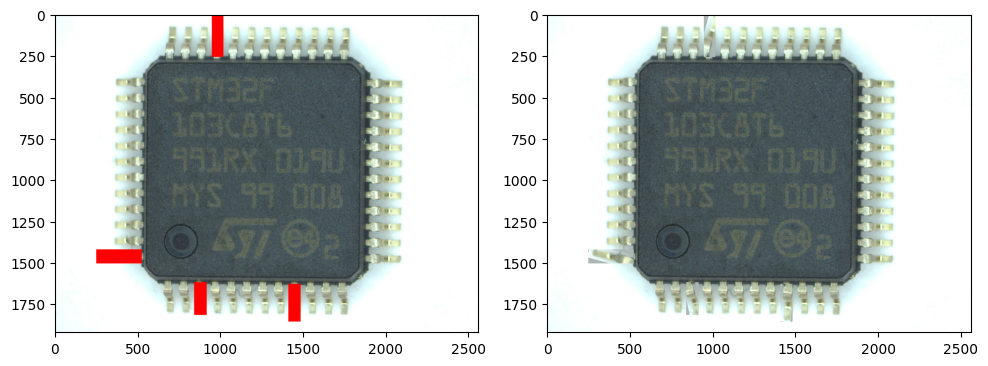

In [8]:
da = DataAugmentator('./783-Pin-Detection/datasets/ic-dataset/images/train',
                     './783-Pin-Detection/datasets/ic-dataset/labels/train')

image = Image.open('./783-Pin-Detection/datasets/ic-dataset/images/train/02.png')
boxes = read_boxes('./783-Pin-Detection/datasets/ic-dataset/labels/train/02.txt')
new_image, good_pins, bad_pins = da.add_bent_pins(image, boxes, n = 4, extend=100)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(overlay_good_pins(
    image,
    bad_pins
))

plt.subplot(1,2,2)
plt.imshow(new_image)

plt.tight_layout()
plt.show()

## Run script to create aug-ic-dataset

In [9]:
input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/train'
output_image_folder = './783-Pin-Detection/datasets/aug-ic-dataset/images/train'
input_label_folder  = './783-Pin-Detection/datasets/ic-dataset/labels/train'
output_label_folder = './783-Pin-Detection/datasets/aug-ic-dataset/labels/train'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]
for image_file in image_files:
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    image_width, image_height = image.size

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)

    boxes = read_boxes(label_path)
    new_image, good_pins, bad_pins = da.add_bent_pins(image, boxes, n = random.randint(0, 10), extend=100, angle=30)

    new_boxes = combineAllBoxes(
        [good_pins, bad_pins, get_boxes(boxes, 2), get_boxes(boxes, 3)]
    )

    new_label_path = os.path.join(output_label_folder, "aug" + label_file)
    save2file(new_boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, "aug" + image_file)
    new_image.save(output_image_path)

    # save original images too
    new_label_path = os.path.join(output_label_folder, label_file)
    save2file(boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, image_file)
    image.save(output_image_path)



Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug02.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\02.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug04.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\04.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug08.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\08.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug10.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\10.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug11.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\11.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\aug12.txt
Data saved to ./783-Pin-Detection/datasets/aug-ic-dataset/labels/train\12.txt
Data saved to ./783-Pin-Detection/datasets/aug

### Copy validation dataset

In [ ]:
input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/val'
output_image_folder = './783-Pin-Detection/datasets/aug-ic-dataset/images/val'
input_label_folder  = './783-Pin-Detection/datasets/ic-dataset/labels/val'
output_label_folder = './783-Pin-Detection/datasets/aug-ic-dataset/labels/val'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]
for image_file in image_files:
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = read_boxes(label_path)

    new_label_path = os.path.join(output_label_folder, label_file)
    save2file(boxes, new_label_path)

    output_image_path = os.path.join(output_image_folder, image_file)
    image.save(output_image_path)